<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/colab_notebooks/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tensor fundamentals using tensorflow

- Introduction to tensors
- getting information from tensor
- manipulating tensors
- tensors and NumPy
- Using tf.function (speed up regular python functions)
- using gpus / tpus with TensorFlow
- Exercises


Introduction to tensors


In [1]:
import tensorflow as tf

print(tf.__version__)

2.11.0


In [2]:
print(tf.config.list_physical_devices('GPU'))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1668933780785114728
xla_global_id: -1
]


In [3]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
#Check number of dimentsions of a tensor (ndim = Number of DIMensions)
scalar.ndim, tf.rank(scalar).numpy() # ndim and tf.rank have the same value

(0, 0)

In [5]:
# create a vector
vector = tf.constant([3,4])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4], dtype=int32)>

In [6]:
# check vector dimension
vector.ndim

1

In [7]:
# matrix (more than 1 dimension)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [8]:
matrix.ndim

2

It seems the dimension of the tensors is related to the number of elements in the `shape` property of the tensor.

In [9]:
# Create another matrix and specify data tyoe
another_matrix = tf.constant([[10.,7.],
                              [8., 9.],
                              [3., 4.]], dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 8.,  9.],
       [ 3.,  4.]], dtype=float16)>

In [10]:
another_matrix.ndim

2

The shape seems to have the format (rows, columns, ...);

In [11]:
# note: all of the above were tensors too as e.g. a matrix is a subtype of a tensor
tensor = tf.constant([
    [[1,2,3], [4,5,6]],
    [[7,8,9], [10,11,12]],
    [[13,14,15], [16,17,18]]
])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [12]:
tensor.ndim

3

### What we learned:

- scalar: a single number
- vector: a number with direction, e.g. wind speed and direction
- matrix: 2-dimensional array of numbers
- tensor: n-dimensional array of numbers (n = any number; a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)


### Creating tensors with tf.Variable and tf.constant

>A variable maintains shared, persistent state manipulated by a program.

https://www.tensorflow.org/api_docs/python/tf/Variable

When in doubt, use constant and change later if needed.

In practice, creating variables / constants is taking care of by tf.

*tensors created with tf.Variable don't seem to have an ndim property?*


In [13]:
v = tf.Variable(1.)
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>

In [14]:
# does not work, shape mismatch
# v.assign([1,2])
v.assign(5.) # works
v

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [15]:
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([4,5])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 5], dtype=int32)>)

In [16]:
changeable_tensor[0]

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [17]:
# changeable_tensor.assign([1,2,3]) # shape mismatch
# unchangeable_tensor.assign([1,2]) # obviousle doesn't even have an assign method
changeable_tensor.assign([1,2]) # works fine

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

In [18]:
# We can also assign single elements
changeable_tensor[0].assign(10)

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([10,  2], dtype=int32)>

### Creating random tensors with tf.Variable()

Random tensors are tensors of arbitrary size containing random numbers.

They are used to initialize the middle layer of the neural network (=representation = patterns = features = weights) and then tweak them by learning.

![random initialization](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/random_init.png?raw=1)

Representation outputs are also referred to as prediction probabilities (the higher the number, the higher the probability.

Example from picture:

first column is Ramen, second column is Spagghetti, third is none. Rows are each of the inputs / pictures (from what i understand).



In [19]:
# create 2 random (but same) tensors
random_1 = tf.random.Generator.from_seed(42); # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2)) # Outputs random values from a normal distribution.
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

>A normal distribution is a type of continuous probability distribution in which most data points cluster toward the middle of the range, while the rest taper off symmetrically toward either extreme. The middle of the range is also known as the mean of the distribution.
[source](https://www.techtarget.com/whatis/definition/normal-distribution)

Basically a bell curve.

In [20]:
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))
random_1, random_2, random_1 == random_2 # same seed, same values

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the order of elements in a tensor

Example use: if a NN has a list of 15000 images, the first 10.000 of Spagghetti and the last 5000 of Ramen, it might optimize too much on the Spagghetti recognition before reaching the Ramen images. It would be better to mix the input (images) so it learns both at the same time.

In [21]:
# shuffle a tensor (valuable to shuffle data so the inherent order doesn't affect learning)
not_shuffled = tf.constant([[10,7],
                            [3,5],
                            [1,9]])
not_shuffled.ndim #2
not_shuffled


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  5],
       [ 1,  9]], dtype=int32)>

In [22]:
# shuffles only the first dimension ("rows"), content of sub-arrays stays the same!

shuffled = tf.random.shuffle(not_shuffled)
shuffled.ndim # also 2 of course
print("random, without seed:", shuffled)

# can take a seed
shuffled = tf.random.shuffle(not_shuffled, 42)
shuffled.ndim # also 2 of course
print("STILL random even with seed:", shuffled)

random, without seed: tf.Tensor(
[[10  7]
 [ 1  9]
 [ 3  5]], shape=(3, 2), dtype=int32)
STILL random even with seed: tf.Tensor(
[[ 1  9]
 [ 3  5]
 [10  7]], shape=(3, 2), dtype=int32)


>"Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed."

[more on the rules of how these seeds are used](https://www.tensorflow.org/api_docs/python/tf/random/set_seed)

In [23]:
tf.random.set_seed(99) # global seed
shuffled = tf.random.shuffle(not_shuffled, seed=42) # operation level seed
shuffled # stays in the same (random) order

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  5],
       [ 1,  9]], dtype=int32)>

For reproducibility of experiments, set both the global and operation level seed.

### Other ways to make tensors

### Creating tensors from NumPy arrays

Note that tensorflow has many NumPy operations (such as `ones`) already built in.

In [24]:
# creates a tensor of a given shape where all elements are 1
tf.ones(shape=(3,2), dtype=tf.int32)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1],
       [1, 1]], dtype=int32)>

In [25]:
# create a tensor of 0s
tf.zeros(shape=(3,2), dtype=tf.int32)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 0],
       [0, 0]], dtype=int32)>

In [26]:
# create a tensor filled with an arbitrary value
tf.fill([3,2], value=99) # note that shape is passed as an array instead of a tupple here

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99],
       [99, 99]], dtype=int32)>

### Turn a NumPy array into tensors

Main difference between NumPy arrays and tf tensors: tensors can be run on a GPU, otherwise very similar


In [27]:
import numpy as np

numpy_a = np.arange(1, 25, dtype=np.int32)

# Capitalization "rules":
# A = tf.constant(some_matrix) # capital for matrix or tensor
# a = tf.constant(vector) # lowercase for vector
numpy_a #  numpy array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [28]:
# convert to tf tensor
tensor_a = tf.constant(numpy_a)
tensor_a

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [29]:
# Change shape from vector to matrix from a one-dimensional array
# the number of elements in the source array must add up to the elements required
# by the shape
A = tf.constant(numpy_a, shape=(3,8))
B = tf.constant(numpy_a)
A, A.ndim, B, B.ndim

(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>,
 2,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>,
 1)

### Getting information from tensors

When dealing with tensors you need to be aware of the following attributes:

- Shape
- Rank
- Axis or dimension
- Size

![attributes](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/tensor_attributes.png?raw=1)

In [30]:
# create rank 4 tensor
rank_4_tensor = tf.zeros([2,3,4,5]) # 2*3*4*5 "4d matrix"
rank_4_tensor, "rank: ", rank_4_tensor.ndim

(<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
 array([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]], dtype=float32)>, 'rank: ', 4)

In [31]:
print(rank_4_tensor[0], "\n")
print(rank_4_tensor[0][0], "\n") 
print(rank_4_tensor[0][0][0], "\n") 
print(rank_4_tensor[0][0][0][0], "\n") 

tf.Tensor(
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]], shape=(3, 4, 5), dtype=float32) 

tf.Tensor(
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]], shape=(4, 5), dtype=float32) 

tf.Tensor([0. 0. 0. 0. 0.], shape=(5,), dtype=float32) 

tf.Tensor(0.0, shape=(), dtype=float32) 



In [32]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [33]:
# Get various attributes of our tensor
def tensor_info(tensor):
  print("Datatype of every element: ", tensor.dtype)
  print("Number of dimensions (rank): ", tensor.ndim)
  print("Shape: ", tensor.shape)
  print("Elements along the 0 axis: ", tensor.shape[0])
  print("Elements along the last axis: ", tensor.shape[-1])
  print("Total number of elements: ", tf.size(tensor))
  print("Total number of elements (plain): ", tf.size(tensor).numpy())

tensor_info(rank_4_tensor)

Datatype of every element:  <dtype: 'float32'>
Number of dimensions (rank):  4
Shape:  (2, 3, 4, 5)
Elements along the 0 axis:  2
Elements along the last axis:  5
Total number of elements:  tf.Tensor(120, shape=(), dtype=int32)
Total number of elements (plain):  120


### Indexing and expanding tensors

Tensors can be indexed like python lists


In [34]:
# get first 2 elements of each tensor dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [35]:
# Example: remove the first element of the innermost tensors
rank_4_tensor[:, :, :, 1:]

<tf.Tensor: shape=(2, 3, 4, 4), dtype=float32, numpy=
array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]], dtype=float32)>

In [36]:
# get the first element from except from the final one
rank_4_tensor[:1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [37]:
# Create a rank 2 tensor
rank_2_tensor = tf.constant([[1,2], [3,4]])
tensor_info(rank_2_tensor), "\n", rank_2_tensor

Datatype of every element:  <dtype: 'int32'>
Number of dimensions (rank):  2
Shape:  (2, 2)
Elements along the 0 axis:  2
Elements along the last axis:  2
Total number of elements:  tf.Tensor(4, shape=(), dtype=int32)
Total number of elements (plain):  4


(None, '\n', <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]], dtype=int32)>)

In [38]:
# Get last item of each row
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 4], dtype=int32)>

In [39]:
# Add extra dimension (important)

# 1st alternative
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # ... = every previous axis, same as [:, :, tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

In [40]:
# 2nd alternative
tf.expand_dims(rank_2_tensor, axis=-1) # -1 = expand final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[1],
        [2]],

       [[3],
        [4]]], dtype=int32)>

In [41]:
tf.expand_dims(rank_2_tensor, axis=0) # expand 0-axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]]], dtype=int32)>

### Manipulating tensors (tensor operations)

**Basic  operations**

+, -, *, /

In [42]:
# add values using the additon operator
# the original tensor stays unchanged of course

tensor = tf.constant([[10,7], [3,4]])
tensor + 10 # adds 10 to all elements in the tensor


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [43]:
tensor - 1 # same for subtraction

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[9, 6],
       [2, 3]], dtype=int32)>

In [44]:
tensor * 3

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[30, 21],
       [ 9, 12]], dtype=int32)>

In [45]:
tensor / 3 # also automatically converts to float

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[3.33333333, 2.33333333],
       [1.        , 1.33333333]])>

In [46]:
# using tf methods (tf.math.* and tf.* are equivalent but not all math.* methods exist on tf.*)
tf.multiply(tensor, 5), tf.math.add(tensor, 5)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[50, 35],
        [15, 20]], dtype=int32)>, <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[15, 12],
        [ 8,  9]], dtype=int32)>)

**For the engine to be able to split up operations, it is best to use the tf.* or tf.math.* methods, not the standard python operators**

### Matrix multiplication

In machine learning, [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html) is the most commoon tensor operation.

A matrix multiplication is the result of the dot product (Skalarprodukt oder inneres Produkt) of rows and columns.

![dot product](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/dot_product.png?raw=1)

[source](https://www.mathsisfun.com/algebra/matrix-multiplying.html)

[Visualize matrix multiplication!](http://matrixmultiplication.xyz/)



Rules: 

1) The *inner* dimensions must match, meaning that **the number of columns of the 1st matrix must equal the number of rows of the 2nd matrix.**

2) The result will have the same number of rows as the 1st matrix and the same number of columns as the 2nd matrix (size is the same as the *outside* numbers)

Inner / outer refers to the position of the dimensions in the multiplication:

- **Inner**: Rows x **COLUMNS** * **ROWS** x Columns
- **Outer**: **ROWS** x Columns * Rows x **COLUMNS**

![matrix multiplication](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/matrix_mult.png?raw=1)


In [47]:
# Matrix multiplication in tensorflow

tf.matmul(tensor, tensor) # same as tf.linalg.matmul, used from here on out

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [48]:

# "real" Matrix multiplication with python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [49]:
# Element-wise matrix multiplication with python operator "*"
tensor * tensor # (10*10, 7*7, 3*3, 4*4)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [50]:
# Create 2 tensors of shape (3,2)
X = tf.constant([[1,2], [3,4], [5,6]]) # 3 rows, 2 columns
Y = tf.constant([[7,8], [9,10], [11,12]]) # 3 rows, 2 columns

try:
  tf.matmul(X, Y) # matrix size incompatible! See rule #1, inner dimensions must match - num rows m1 must be num cols m2
except tf.errors.InvalidArgumentError as err:
    print(err)

{{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul]


In [51]:
# Let's change the shape of Y (doesn't the matrix have an entire different meaning then?)
print(Y, "\n")
tf.reshape(Y, shape=(2,3))

tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 



<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [52]:
# try to multipley X by reshaped Y
X @ tf.reshape(X, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]], dtype=int32)>

In [53]:
X.shape, tf.reshape(Y, shape=(2,3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [54]:
tf.matmul(X, tf.reshape(Y, shape=(2,3))) # works the same as @

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [55]:
# try changing X instead of Y
tf.reshape(X, shape=(2,3)) @ Y

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

-> Reshaping X works, too, but the result is different as now the *outer* dimensions is 2 for both.

In [56]:
# we can do the same with transpose, but it does a different thing than reshape
X, tf.transpose(X), tf.reshape(X, shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

- [transpose](https://www.tensorflow.org/api_docs/python/tf/transpose) flips the axes' 
- [reshape](https://www.tensorflow.org/api_docs/python/tf/reshape) assigns the numbers lineary from top left to bottom right in the same order but in a different shape ("Given tensor, this operation returns a new tf.Tensor that has the same values as tensor in the same order, except with a new shape given by shape.")

They don't give the same results in the resulting matrix or the multiplication result.

In [57]:
# try multiplication with transpose rather than reshape
tf.transpose(X) @ Y

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**

**The dot product**

Matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication using:

- `tf.matmul()`
- [`tf.tensordot()`](https://www.tensorflow.org/api_docs/python/tf/tensordot)


In [58]:
X, Y # little reminder

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [59]:
# Perfomr dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [60]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [61]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [62]:
# Check the values of Y, reshape Y and transpose Y
print("Normal Y: ")
print(Y, "\n")

print("Y reshaped to (2, 3): ")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed: ")
print(tf.transpose(Y), "\n")

Normal Y: 
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3): 
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed: 
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32) 



In [63]:
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

Most matrix modification is done behind the scenes in tensorflow, meaning it doesn't have to be done by hand a lot.

**Generally, if tensor dimensions don't line up, one of the tensors should be transposed and not reshaped to satisfy the matrix multiplication rules.**

### Changing the datatype of tensors

Default datatype is mostly int32 or float32, depending on the data inside the tensor. Models / data with lower precision types (or mixed precision) can run faster on gpus and in general.

https://www.tensorflow.org/guide/mixed_precision


In [64]:
# create tensor with default datatype (float32 fpr floats)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [65]:
# int32 for integers
C = tf.constant([7,10])
C.dtype

tf.int32

In [66]:
# change from float32 to float16 (reduced precission)
D = tf.cast(C, tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>,
 tf.float16)

In [67]:
# change from int32 to float32
E = tf.cast(C, dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

In [68]:
# casting from float to int removes decimals
F = tf.cast(B, dtype=tf.int32)
F

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 7], dtype=int32)>

### Aggregating tensors

Aggregating tensors = condensing them from multiple values down to a smaller amount of values.


In [69]:
# Get the absolute values
D = tf.constant([-1, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -1, -10], dtype=int32)>

In [70]:
# get the absolute values (turn negative into positive numbers)
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 1, 10], dtype=int32)>

More forms of aggregation:

- get the minimum
- get the maximum
- get the mean
- get the sum

In [71]:
# Minimum
d_min = tf.math.reduce_min(D)
d_min

<tf.Tensor: shape=(), dtype=int32, numpy=-10>

In [72]:
# Maximum
d_min = tf.math.reduce_max(D)
d_min

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [73]:
# mean
d_mean = tf.math.reduce_mean(D, 0)
d_mean

<tf.Tensor: shape=(), dtype=int32, numpy=-5>

In [74]:
# sum
# d_sum = tf.math.add_n(D) works on 1d tensor though
d_sum = tf.math.reduce_sum(D)
d_sum

<tf.Tensor: shape=(), dtype=int32, numpy=-11>

Same on 2d tensor / matrix


In [75]:
# create a large-ish random 2d tensor (tensor of dimension 2)
t = tf.constant(np.random.randint(0, 100, size=50))
t = tf.reshape(t, shape=(5, 10))
t, t.ndim

(<tf.Tensor: shape=(5, 10), dtype=int64, numpy=
 array([[ 8, 58, 78, 25, 37, 34, 29,  5, 61, 38],
        [13, 97, 76, 83, 91, 48, 98, 70, 23, 47],
        [93, 91, 49, 12, 36, 60, 32, 84, 15, 30],
        [ 3, 91, 54, 72, 65, 78, 48, 73, 57, 65],
        [95, 37, 71, 75,  2, 57, 92, 55, 64, 20]])>, 2)

In [76]:
# Minimum of each row
t_min_in_rows = tf.math.reduce_min(t, axis=1)
t_min_in_rows

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 5, 13, 12,  3,  2])>

In [77]:
# Minimum of each column
t_min_in_cols = tf.math.reduce_min(t, axis=0)
t_min_in_cols

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 3, 37, 49, 12,  2, 34, 29,  5, 15, 20])>

In [78]:
# mean (rows)
t_mean_rows = tf.math.reduce_mean(t, axis=1)
t_mean_rows

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([37, 64, 50, 60, 56])>

In [79]:
# mean (columns)
t_mean_columns = tf.math.reduce_mean(t, axis=0)
t_mean_columns

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([42, 74, 65, 53, 46, 55, 59, 57, 44, 40])>

In [80]:
# sum (rows)
t_sum_rows = tf.math.reduce_sum(t, axis=1)
t_sum_rows

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([373, 646, 502, 606, 568])>

***Exercise***: find variance and standard deviation of `t`

#### Standard deviation

The standard deviation is the average amount of variability in your data set. It tells you, on average, how far each score lies from the mean.

>For a finite set of numbers, the population standard deviation is found by taking the square root of the average of the squared deviations of the values subtracted from their average value.

[on wikipedia](https://en.wikipedia.org/wiki/Standard_deviation)

[on khan academy](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/a/calculating-standard-deviation-step-by-step)

It is used to 

- detect outliers in a dataset (and remove them if necessary)
- scale values in different datasets (e.g. house prices and number of rooms) to the same scale (dividing the difference between the mean and each value by the standard deviation of the data)



In [81]:
# cast to float as necessary for finding standard deviation and variance
t_float = tf.cast(t, dtype=tf.float64)
t_float

<tf.Tensor: shape=(5, 10), dtype=float64, numpy=
array([[ 8., 58., 78., 25., 37., 34., 29.,  5., 61., 38.],
       [13., 97., 76., 83., 91., 48., 98., 70., 23., 47.],
       [93., 91., 49., 12., 36., 60., 32., 84., 15., 30.],
       [ 3., 91., 54., 72., 65., 78., 48., 73., 57., 65.],
       [95., 37., 71., 75.,  2., 57., 92., 55., 64., 20.]])>

In [82]:
# find standard deviation of whole tensor
t_standard_deviation = tf.math.reduce_std(t_float)
t_standard_deviation

<tf.Tensor: shape=(), dtype=float64, numpy=27.993749302299612>

In [83]:
# standard deviation of rows / columns
print(tf.math.reduce_std(t_float, axis=1), "\n") # rows
print(tf.math.reduce_std(t_float, axis=0), "\n") # columns

tf.Tensor([21.8634398  28.87628785 28.94062888 22.54417885 28.34713389], shape=(5,), dtype=float64) 

tf.Tensor(
[42.25446722 23.3615068  11.84229707 29.01447914 30.00933188 14.47204201
 29.51880756 27.78920654 20.68816087 15.34926708], shape=(10,), dtype=float64) 



#### Variance

>Population variance is a measure of how spread out a group of data points is. Specifically, it quantifies the average squared deviation from the mean. So, if all data points are very close to the mean, the variance will be small; if data points are spread out over a wide range, the variance will be larger. Created by Sal Khan.

[source](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/v/variance-of-a-population)


In [84]:
# variance whole tensor
tf.math.reduce_variance(t_float)

<tf.Tensor: shape=(), dtype=float64, numpy=783.65>

In [85]:
# variance rows (for columns just change axis as before)
tf.math.reduce_variance(t_float, axis=1)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([478.01, 833.84, 837.56, 508.24, 803.56])>

We can also use `tensorflow_probability` for these:

In [86]:
import tensorflow_probability as tfp
print(tfp.stats.variance(t_float, sample_axis=1), "\n")

# we must specify an axis, so to use tfp.stats.variance on the whole matrix, we must reshape it to one dimension
tfp.stats.variance(tf.reshape(t_float, shape=(50,)))

tf.Tensor([478.01 833.84 837.56 508.24 803.56], shape=(5,), dtype=float64) 



<tf.Tensor: shape=(), dtype=float64, numpy=783.65>

### Find the positional minimum and maximum

- positional minimum: Returns the index with the smallest value across axes of a tensor. `tf.math.argmin`
- positional maximum: Returns the index with the largest value across axes of a tensor. `tf.math.argmax`

Use: when we have a matrix of prediction probabilites where the *columns* belong to labels and *rows* belong to the inputs:

```
# Spag   Ramen  Other
[[0.983, 0.004, 0.013],
 [0.110, 0.235, 0.801],
 [0.023, 0.985, 0.27]]
```

we need the positional maximum - the index - to get the resulting label, e.g. row 3, index 1 => highest probability for input 3 is index 1 = Ramen


In [87]:
# tensor for finding positional min / max
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [88]:
# find positional maximum and display its value
tf.argmax(F), F[tf.argmax(F)]

(<tf.Tensor: shape=(), dtype=int64, numpy=42>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>)

In [89]:
# find positional minimum and display its value
tf.argmin(F), F[tf.argmin(F)]

(<tf.Tensor: shape=(), dtype=int64, numpy=16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>)

In [90]:
# Find all positional maximums in a matrix
F_2d = tf.random.uniform(shape=(5,5))
print(F_2d, "\n")
max_indices = tf.argmax(F_2d, axis=0);
print("max index for each row\n", max_indices)

print("As table using python formatted string literals just for practice")
print([f"{max_indices.numpy()[idx]}: {F_2d[idx, max_indices[idx]]}" for idx in range(len(max_indices))])

print("As pandas table")
import pandas as pd
pd.DataFrame({"index": max_indices, "val": [F_2d[max_indices[idx], idx].numpy() for idx in range(len(max_indices))]})

tf.Tensor(
[[0.68789124 0.48447883 0.9309944  0.252187   0.73115396]
 [0.89256823 0.94674826 0.7493341  0.34925628 0.54718256]
 [0.26160395 0.69734323 0.11962581 0.53484344 0.7148968 ]
 [0.87501776 0.33967495 0.17377627 0.4418521  0.9008261 ]
 [0.13803864 0.12217975 0.5754491  0.9417181  0.9186585 ]], shape=(5, 5), dtype=float32) 

max index for each row
 tf.Tensor([1 1 0 4 4], shape=(5,), dtype=int64)
As table using python formatted string literals just for practice
['1: 0.48447883129119873', '1: 0.9467482566833496', '0: 0.2616039514541626', '4: 0.900826096534729', '4: 0.9186584949493408']
As pandas table


,index,val
0,1,0.892568
1,1,0.946748
2,0,0.930994
3,4,0.941718
4,4,0.918658


No example for argmin as it's redundant.

### Squeezing a tensor (removing all single dimensions)

In [91]:
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=[1, 1, 1, 1, 50])
G, G.shape

(<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
 array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
            0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
            0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
            0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
            0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
            0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
            0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
            0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
            0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
            0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
       dtype=float32)>, TensorShape([1, 1, 1, 1, 50]))

In [92]:
# remove dimensions of size 1 from the shape of a tensor
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>, TensorShape([50]))

### One-hot encoding tensors

[good explanation](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)

A form of numerical encoding of non-numeric input data.

Gist:

We have original data:
```
company price
VW      19999
Acura   10000
Honda   29000
Honda   ...
Acura   
```

Add a categorical value (a number "encoding" of the company, basically a value from 0 to N-1 categories). Category here is the company.

```
company categoricalValue price
VW      0                ...  
Acura   1
Honda   2
Honda   2
Acura   1
```

These can be **one-hot** (just binary) encoded by adding columns and encoding if the row belongs to a category using *1* (existant) and *0* (not existant):

```
VW  Acura  Honda  Price
1   0      0      19999
0   1      0      ...
0   0      1      
0   0      1
0   1      0
```

If we just used the feature number, the ML algorithm would see it as one feature and would calculate stupid averages (e.g. the average of VW and Honda is 1.5).

[more explanation](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)



In [93]:
# Create a list of indices
some_list = [0, 1, 2, 3, 3, 0]; # could be red, green, blue, purple

# One hot encode list of indices
# depth = "A scalar defining the depth of the one hot dimension". Basically, how many unique values there are
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)>

In [94]:
# specify custom values for one hot encoding
tf.one_hot(some_list, depth=6, on_value="x", off_value="o")

<tf.Tensor: shape=(6, 6), dtype=string, numpy=
array([[b'x', b'o', b'o', b'o', b'o', b'o'],
       [b'o', b'x', b'o', b'o', b'o', b'o'],
       [b'o', b'o', b'x', b'o', b'o', b'o'],
       [b'o', b'o', b'o', b'x', b'o', b'o'],
       [b'o', b'o', b'o', b'x', b'o', b'o'],
       [b'x', b'o', b'o', b'o', b'o', b'o']], dtype=object)>

### Squaring, log, square root

In [95]:
H = tf.range(1.,10.) # some math ops require floats
H

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>

In [96]:
# square
# might be useful to make data more distinct without changing the relative values
tf.math.square(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([ 1.,  4.,  9., 16., 25., 36., 49., 64., 81.], dtype=float32)>

In [97]:
# assign values to a logarithmic scale
tf.math.log(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

In [98]:
# square root
tf.math.sqrt(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

### Exploring tensorflow and NumPys compatibility

Tensorflow interacts nicely with NumPy, fundamental mathematical library of python, built on numpy arrays (type = `numpy.ndarray`).


In [99]:
# create a tensor from a numpy array
J = tf.constant(np.array([1.,2.,3.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 2., 3.])>

In [100]:
# convert it back to a numpy array with various methods
print(J.numpy(), ": ", type(J.numpy()), "\n")
print(np.array(J), ": ", type(np.array(J)), "\n")

[1. 2. 3.] :  <class 'numpy.ndarray'> 

[1. 2. 3.] :  <class 'numpy.ndarray'> 



In [101]:
J = tf.constant([3.])
J.numpy()[0]

3.0

In [102]:
# default types of tf an np are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
print("numpy_J (tensor from numpy array): ", numpy_J, "\n") # defaults to float64
tensor_J = tf.constant([3., 7., 10.])
print("tensor_J (tensor from python array): ", tensor_J, "\n") # defaults to float32

numpy_J (tensor from numpy array):  tf.Tensor([ 3.  7. 10.], shape=(3,), dtype=float64) 

tensor_J (tensor from python array):  tf.Tensor([ 3.  7. 10.], shape=(3,), dtype=float32) 



### Ensuring tensor operations can run on GPUs / TPUs

The main difference between tensor and numpy array is that **a TensorFlow tensor can be run on a GPU or TPU**.



In [103]:
# check physical devices
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [104]:
# check specific devices
tf.config.list_physical_devices("GPU")

[]

In google colab, we can switch between cpu, gpu and tpu (based on availability) in "change runtime type" at the bottom of the resources bar ("view resources" in the little menu beside the ram/disk usage indicator in the top right).

In [105]:
# ! runs commands on the command line
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



**Note**: If you have access to a CUDA-enabled GPU, TensorFlow will automatically use it whenever possible.

### Exercises

In [106]:
# 1. Create a vector, scalar, matrix and tensor with values of your choosing using tf.constant().
vector = tf.constant([1,2,3])
scalar = tf.constant(42)
matrix = tf.constant([[1,2,3],
                      [4,5,6], 
                      [7,8,9]])
tensor = tf.constant([[[1,2,3], # all others are tensors too of course
                      [4,5,6], 
                      [7,8,9]],
                      [[1,2,3],
                      [4,5,6], 
                      [7,8,9]]])
vector, scalar, matrix, tensor


(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=42>,
 <tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
 array([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],
 
        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]], dtype=int32)>)

In [107]:
# 2. Find the shape, rank and size of the tensors you created in 1
vector.shape, vector.ndim, tf.size(vector), tensor.shape, tensor.ndim, tf.size(tensor)

(TensorShape([3]),
 1,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>,
 TensorShape([2, 3, 3]),
 3,
 <tf.Tensor: shape=(), dtype=int32, numpy=18>)

In [108]:
# 3. Create two tensors containing random values between 0 and 1 with shape [5, 300]
r1 = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
r2 = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
r1, r2

(<tf.Tensor: shape=(5, 300), dtype=float32, numpy=
 array([[0.68789124, 0.48447883, 0.9309944 , ..., 0.6920762 , 0.33180213,
         0.9212563 ],
        [0.27369928, 0.10631859, 0.6218617 , ..., 0.4382149 , 0.30427706,
         0.51477313],
        [0.00920248, 0.37280262, 0.8177401 , ..., 0.56786287, 0.49201214,
         0.9892651 ],
        [0.88608265, 0.08672249, 0.12160683, ..., 0.91770685, 0.72545695,
         0.8280058 ],
        [0.36690474, 0.9200133 , 0.9646884 , ..., 0.69012   , 0.7137332 ,
         0.2584542 ]], dtype=float32)>,
 <tf.Tensor: shape=(5, 300), dtype=float32, numpy=
 array([[0.7413678 , 0.62854624, 0.01738465, ..., 0.4851334 , 0.21059811,
         0.25082767],
        [0.10842848, 0.48783147, 0.8240961 , ..., 0.9204427 , 0.36046863,
         0.28176582],
        [0.7326695 , 0.46489418, 0.13622475, ..., 0.28130388, 0.63987684,
         0.9987265 ],
        [0.01447165, 0.7845044 , 0.33475304, ..., 0.56194997, 0.0209924 ,
         0.1740731 ],
        [0.90936

In [109]:
# 4. Multiply the two tensors you created in 3 using matrix multiplication.
print(r1 @ tf.transpose(r2)) # using python operator
print(tf.matmul(r1, tf.transpose(r2))) # using tensorflow

tf.Tensor(
[[75.714005 80.87824  78.32848  78.259705 79.130585]
 [70.12708  72.09945  70.1678   73.24609  74.277405]
 [75.16     79.52858  76.74644  78.14265  77.28679 ]
 [77.113556 75.401215 72.79378  75.066376 75.206535]
 [79.87284  83.40138  78.57373  79.025894 81.82093 ]], shape=(5, 5), dtype=float32)
tf.Tensor(
[[75.714005 80.87824  78.32848  78.259705 79.130585]
 [70.12708  72.09945  70.1678   73.24609  74.277405]
 [75.16     79.52858  76.74644  78.14265  77.28679 ]
 [77.113556 75.401215 72.79378  75.066376 75.206535]
 [79.87284  83.40138  78.57373  79.025894 81.82093 ]], shape=(5, 5), dtype=float32)


In [110]:
# 5. Multiply the two tensors you created in 3 using dot product.
tf.tensordot(r1, tf.transpose(r2), axes=1)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[75.714005, 80.87824 , 78.32848 , 78.259705, 79.130585],
       [70.12708 , 72.09945 , 70.1678  , 73.24609 , 74.277405],
       [75.16    , 79.52858 , 76.74644 , 78.14265 , 77.28679 ],
       [77.113556, 75.401215, 72.79378 , 75.066376, 75.206535],
       [79.87284 , 83.40138 , 78.57373 , 79.025894, 81.82093 ]],
      dtype=float32)>

In [111]:
def print_short(t, length=200):
  print(str(t)[:length], "...\n")

In [112]:
# 6. Create a tensor with random values between 0 and 1 with shape [224, 224, 3]
r3 = tf.constant(tf.random.uniform(shape=(224,224,3), minval=0, maxval=1))
print_short(r3)

tf.Tensor(
[[[7.4023080e-01 3.3938193e-01 5.6925058e-01]
  [4.4811392e-01 2.9285502e-01 4.2600560e-01]
  [6.2890387e-01 6.9106102e-01 3.0925727e-01]
  ...
  [9.1063976e-04 6.9863999e-01 1.7180574e-01] ...



In [113]:
# 7. Find the min and max values of the tensor you created in 6 along the first axis
print_short(tf.math.reduce_min(r3, axis=0))
print_short(tf.math.reduce_max(r3, axis=2))
print("max value of the whole tensor: ", tf.math.reduce_max(r3).numpy())

tf.Tensor(
[[2.03430653e-03 4.37009335e-03 3.90768051e-04]
 [3.51417065e-03 7.98487663e-03 3.59594822e-03]
 [6.48093224e-03 2.49707699e-03 8.29935074e-04]
 [1.56582594e-02 7.75694847e-04 9.87851620e-0 ...

tf.Tensor(
[[0.7402308  0.44811392 0.691061   ... 0.69864    0.8349292  0.6223943 ]
 [0.9706496  0.28982997 0.6559715  ... 0.95621395 0.98861516 0.7266861 ]
 [0.7669786  0.27192724 0.6145171  ... 0.84 ...

max value of the whole tensor:  0.9999902


In [114]:
# 8. Created a tensor with random values of shape [1, 224, 224, 3] then squeeze it to change the shape to [224, 224, 3].
r4 = tf.random.uniform(shape=(1,224,224,3), minval=0, maxval=1)
print_short(r4) # just show the first 100 characters of the result
print_short(tf.squeeze(r4))
tf.squeeze(r4).shape

tf.Tensor(
[[[[8.0315602e-01 4.9777734e-01 3.7054038e-01]
   [9.1186738e-01 6.3764203e-01 1.8209696e-01]
   [6.3791955e-01 2.7701473e-01 4.2271137e-02]
   ...
   [1.0830712e-01 4.5979273e-01 2.5716281 ...

tf.Tensor(
[[[8.0315602e-01 4.9777734e-01 3.7054038e-01]
  [9.1186738e-01 6.3764203e-01 1.8209696e-01]
  [6.3791955e-01 2.7701473e-01 4.2271137e-02]
  ...
  [1.0830712e-01 4.5979273e-01 2.5716281e-01] ...



TensorShape([224, 224, 3])

In [115]:
# 9. Create a tensor with shape [10] using your own choice of values, then find the index which has the maximum value.
tensor = tf.random.shuffle(tf.constant(list(range(1,6)) + list(range(1,6))))
tensor

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([5, 4, 5, 4, 3, 3, 2, 1, 2, 1], dtype=int32)>

In [116]:
# 10. One-hot encode the tensor you created in 9
pd.DataFrame(tf.one_hot(tensor, 5).numpy())

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


### Extra curriculum

Read through the list of [TensorFlow Python APIs](https://www.tensorflow.org/api_docs/python/), pick one we haven't gone through in this notebook, reverse engineer it (write out the documentation code for yourself) and figure out what it does.

Try to create a series of tensor functions to calculate your most recent grocery bill (it's okay if you don't use the names of the items, just the price in numerical form).

- How would you calculate your grocery bill for the month and for the year using tensors?


#### TensorFlow 2 quickstart for beginners

Go through the TensorFlow 2.x quick start for beginners tutorial (be sure to type out all of the code yourself, even if you don't understand it).

- Are there any functions we used in here that match what's used in there? Which are the same? Which haven't you seen before?


In [117]:
tf.__version__

'2.11.0'

In [118]:
# upgrade version as the tutorial uses tf 2.11
# uncomment when running again on a different machine
# !pip install --upgrade tensorflow 

In [119]:
# load and prepare mnist (handwritten digit) dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("shape", "\n", x_train[0].shape)
x_train[0] # elements in x_train are 28*28 bitmaps with grayscale values

shape 
 (28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

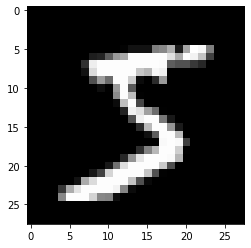

In [120]:
from matplotlib import pyplot

pyplot.imshow(x_train[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [121]:
y_train[0] # y_train contains the correct numbers / letters for the training data

5

In [122]:
# Build a tf.keras.Sequential model by stacking layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

For each example, the model returns a vector of logits or log-odds scores, one for each class.

In [123]:
predictions = model(x_train[:1]).numpy() # get predictions for first image (a "5")
predictions

array([[-175.84702  , -166.35207  , -132.70569  ,  -22.333746 ,
          90.2171   ,    9.537003 ,    0.5124817,  -78.127205 ,
          33.458122 ,  -81.48904  ]], dtype=float32)

In [124]:
# The tf.nn.softmax function converts these logits to probabilities for each class:
tf.nn.softmax(predictions).numpy()

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 9.1427739e-36, 0.0000000e+00, 0.0000000e+00,
        2.2381453e-25, 0.0000000e+00]], dtype=float32)

**Note**: I'm getting different results here as in the tutorial, even after upgrading tf to 2.11
**solution** It's an *untrained* model so of course the result is more or less random for now

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a True index and returns a scalar loss for each example.

In [126]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.


This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

In [130]:
loss_fn(y_train[:1], predictions).numpy()

80.6801

Before you start training, configure and compile the model using Keras Model.compile. Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.

In [131]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


*Train and evaluate your model*

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [132]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 2.5572 - accuracy: 0.7329
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5946 - accuracy: 0.8382
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4627 - accuracy: 0.8719
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4252 - accuracy: 0.8870
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3962 - accuracy: 0.8949


Evaluate the models performance with the test data using `Model.evaluate`

In [133]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2774 - accuracy: 0.9311 - 1s/epoch - 4ms/step


[0.27737104892730713, 0.9311000108718872]

The image classifier is now trained to ~93% accuracy on this dataset.

For the trained model to return a probability, it can be wrapped it and attach a softmax to it:

In [134]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

probability_model(x_test[:5]) # return probabilities for the first 5 items in the test dataset

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.4674582e-30, 5.5729562e-20, 5.4447073e-06, 3.6719978e-11,
        1.0614560e-14, 2.9474454e-22, 0.0000000e+00, 9.9999452e-01,
        0.0000000e+00, 6.3350388e-12],
       [1.2579211e-25, 3.5166134e-10, 1.0000000e+00, 1.3697429e-11,
        0.0000000e+00, 5.9791103e-17, 1.0483130e-26, 3.7012533e-12,
        6.6467188e-22, 0.0000000e+00],
       [1.9003670e-28, 9.9992561e-01, 3.9110725e-11, 2.6818142e-31,
        2.0632345e-24, 2.1487850e-14, 2.1194628e-28, 7.4340904e-05,
        2.4065760e-10, 4.6448492e-19],
       [9.9902761e-01, 1.8298787e-19, 8.7913241e-07, 1.2033315e-09,
        2.6009038e-17, 9.5363741e-04, 3.1011787e-08, 1.7641654e-05,
        1.2010146e-07, 5.1028561e-08],
       [3.0504591e-19, 4.2787498e-09, 1.3467343e-07, 1.1287333e-08,
        9.9986899e-01, 8.5935647e-10, 7.0781407e-14, 9.3049216e-08,
        5.4319889e-11, 1.3078784e-04]], dtype=float32)>

Quickstart Tutorial end

Watch the video ["What's a tensor?"](https://www.youtube.com/watch?v=f5liqUk0ZTw) - a great visual introduction to many of the concepts we've covered in this notebook.

**done**